In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
df = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\Города млн\Сентябрь\Вторичка\Вторичка сентябрь для исследования.xlsx")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143490 entries, 0 to 143489
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Гео1                      143490 non-null  object 
 1   Гео2                      143490 non-null  object 
 2   Гео3                      143490 non-null  object 
 3   Гео4                      143483 non-null  object 
 4   Расстояние до центра, км  109389 non-null  float64
 5   Кол-во комнат             142828 non-null  float64
 6   Площадь                   143490 non-null  float64
 7   Цена                      143490 non-null  int64  
 8   Отделка                   143490 non-null  object 
 9   Объявление от             138467 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 10.9+ MB


In [19]:
df['Цена метра'] = df['Цена'] / df['Площадь']

In [20]:
df['Расстояние до центра, км'] = df['Расстояние до центра, км'].round()

In [38]:
df = df[df['Расстояние до центра, км'].notna()]

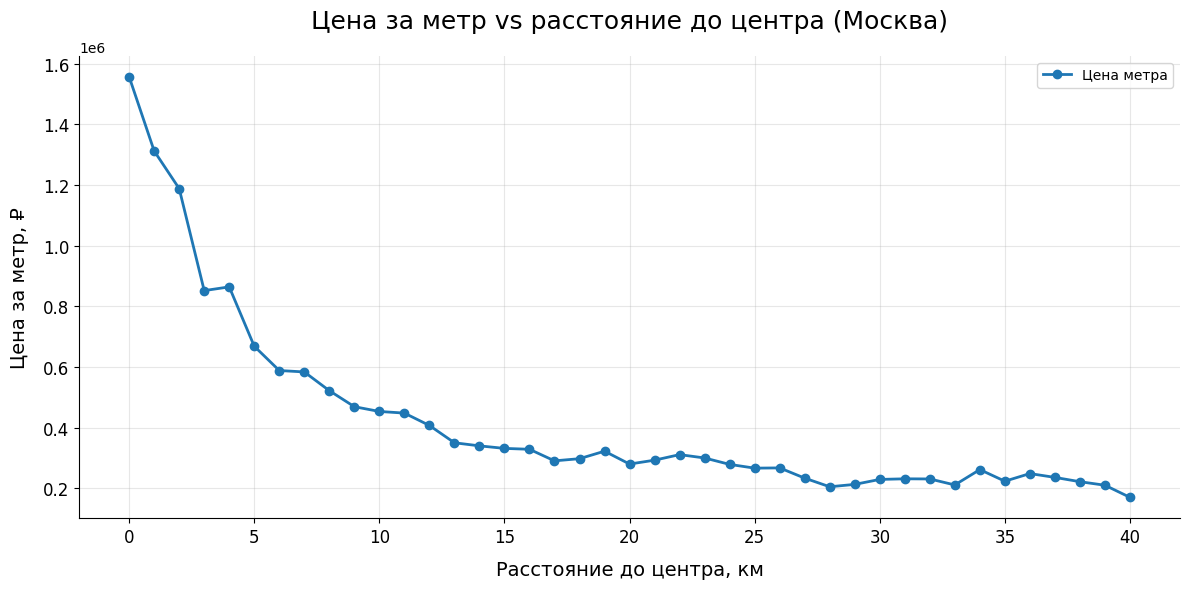

In [49]:
# Строим график
ax = (
    df.query('Гео1 == "Москва" and `Расстояние до центра, км` <= 40')
    .pivot_table(index='Расстояние до центра, км', values='Цена метра')
    .plot(figsize=(12, 6), grid=True, linewidth=2, marker='o')
)

# Заголовок
ax.set_title("Цена за метр vs расстояние до центра (Москва)", fontsize=18, pad=20)

# Подписи осей
ax.set_xlabel("Расстояние до центра, км", fontsize=14, labelpad=10)
ax.set_ylabel("Цена за метр, ₽", fontsize=14, labelpad=10)

# Убираем рамку сверху и справа
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Более крупный шрифт для подписей осей
ax.tick_params(axis='both', which='major', labelsize=12)

# Лёгкая сетка
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

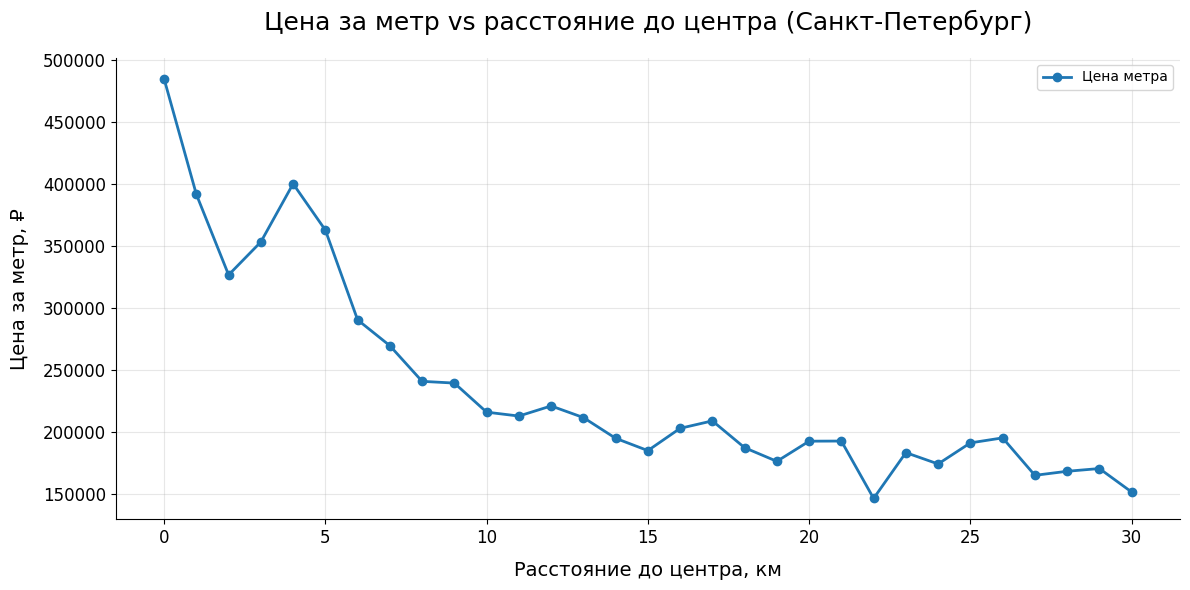

In [58]:
# Строим график
ax = (
    df.query('Гео1 == "Санкт-Петербург" and `Расстояние до центра, км` <= 30')
    .pivot_table(index='Расстояние до центра, км', values='Цена метра')
    .plot(figsize=(12, 6), grid=True, linewidth=2, marker='o')
)

# Заголовок
ax.set_title("Цена за метр vs расстояние до центра (Санкт-Петербург)", fontsize=18, pad=20)

# Подписи осей
ax.set_xlabel("Расстояние до центра, км", fontsize=14, labelpad=10)
ax.set_ylabel("Цена за метр, ₽", fontsize=14, labelpad=10)

# Убираем рамку сверху и справа
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Более крупный шрифт для подписей осей
ax.tick_params(axis='both', which='major', labelsize=12)

# Лёгкая сетка
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

<Axes: xlabel='Расстояние до центра, км'>

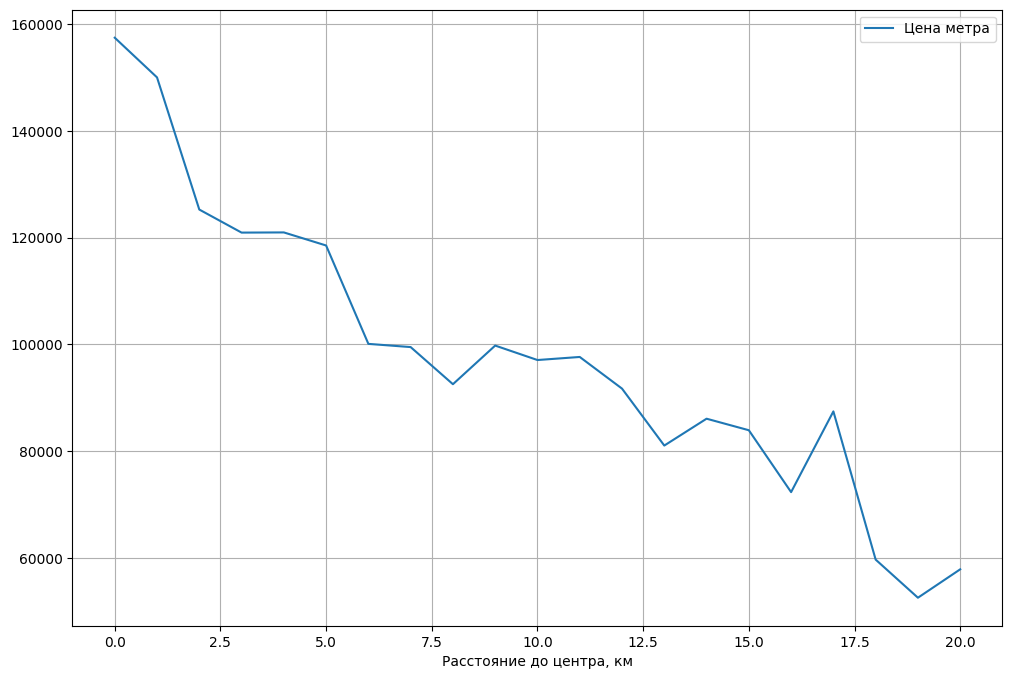

In [28]:
df.query('Гео1 == "Волгоградская область" and `Расстояние до центра, км` <= 20').pivot_table(index='Расстояние до центра, км', values='Цена метра').plot(grid=True, figsize=(12,8))

<Axes: xlabel='Расстояние до центра, км'>

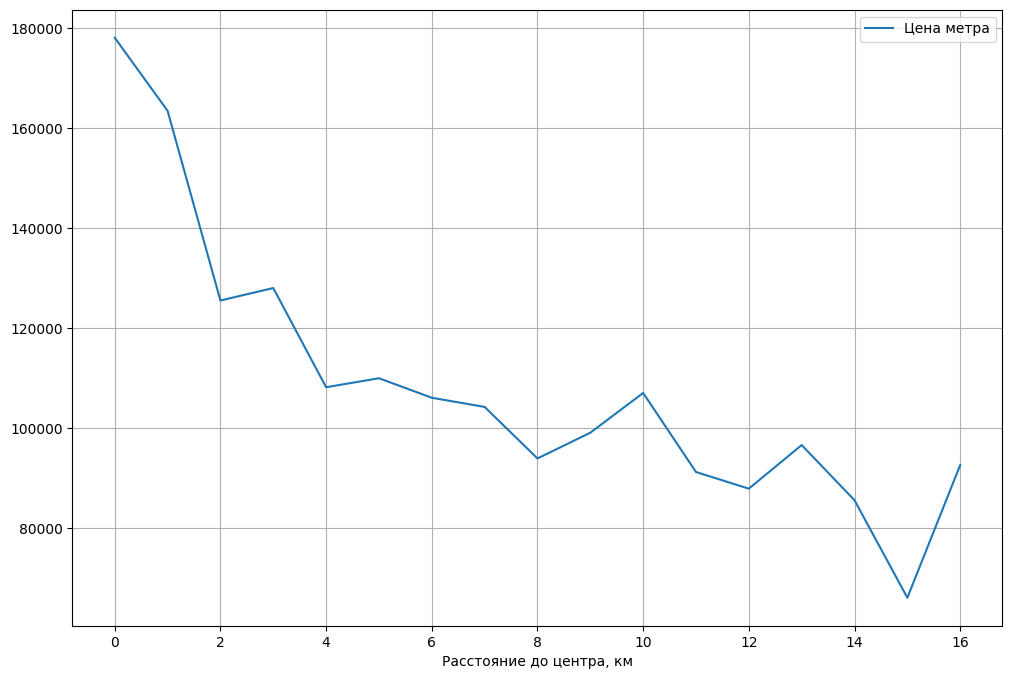

In [32]:
df.query('Гео1 == "Воронежская область" and `Расстояние до центра, км` <= 20').pivot_table(index='Расстояние до центра, км', values='Цена метра').plot(grid=True, figsize=(12,8))

<Axes: xlabel='Расстояние до центра, км'>

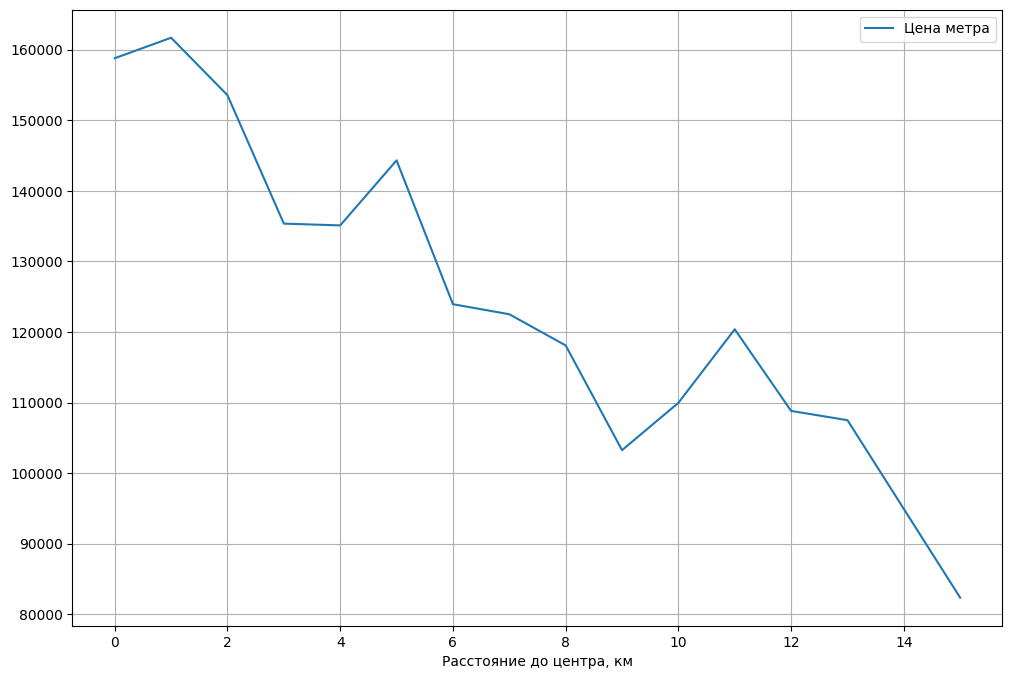

In [36]:
df.query('Гео1 == "Красноярский край" and `Расстояние до центра, км` <= 20').pivot_table(index='Расстояние до центра, км', values='Цена метра').plot(grid=True, figsize=(12,8))

In [25]:
df['Гео1'].unique()

array(['Волгоградская область', 'Воронежская область',
       'Краснодарский край', 'Республика Адыгея', 'Красноярский край',
       'Москва', 'Нижегородская область', 'Новосибирская область',
       'Омская область', 'Пермский край', 'Республика Башкортостан',
       'Республика Татарстан', 'Ростовская область', 'Самарская область',
       'Санкт-Петербург', 'Свердловская область', 'Челябинская область'],
      dtype=object)

<Axes: xlabel='Расстояние до центра, км'>

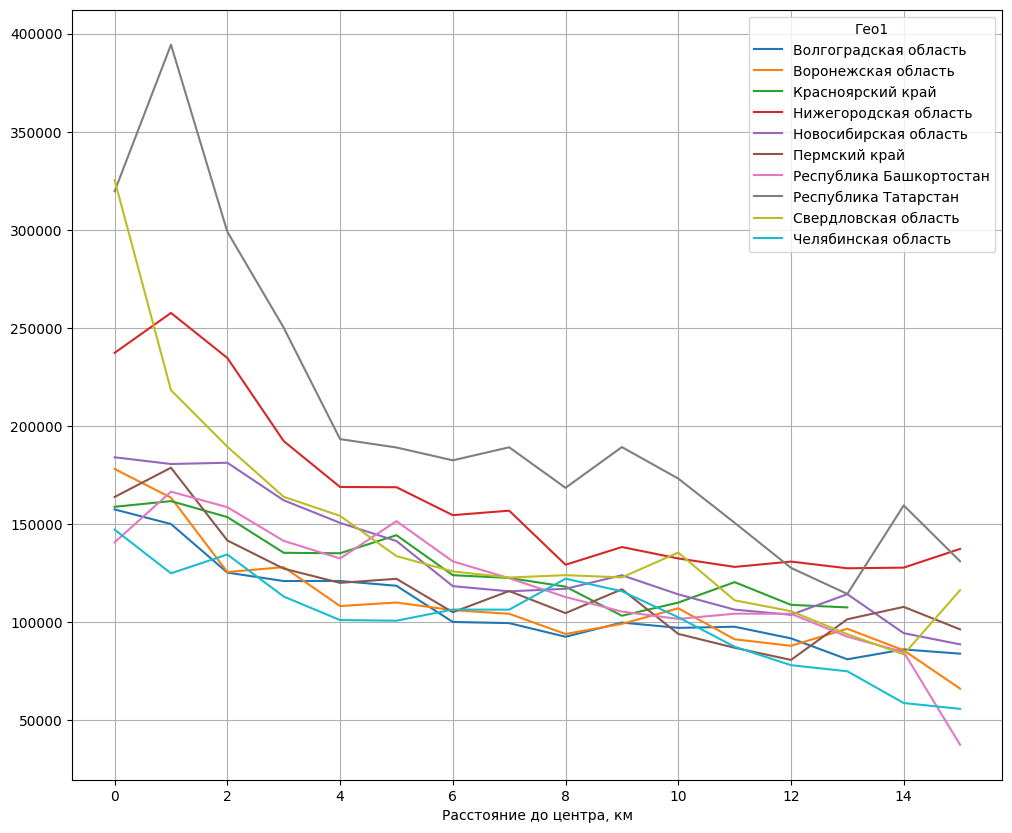

In [44]:
(
    df.query('`Расстояние до центра, км` <= 15 and Гео1 != "Москва" and Гео1 != "Санкт-Петербург"')
    .pivot_table(index='Расстояние до центра, км', columns='Гео1', values='Цена метра')
    .plot(figsize=(12, 10), grid=True)
)

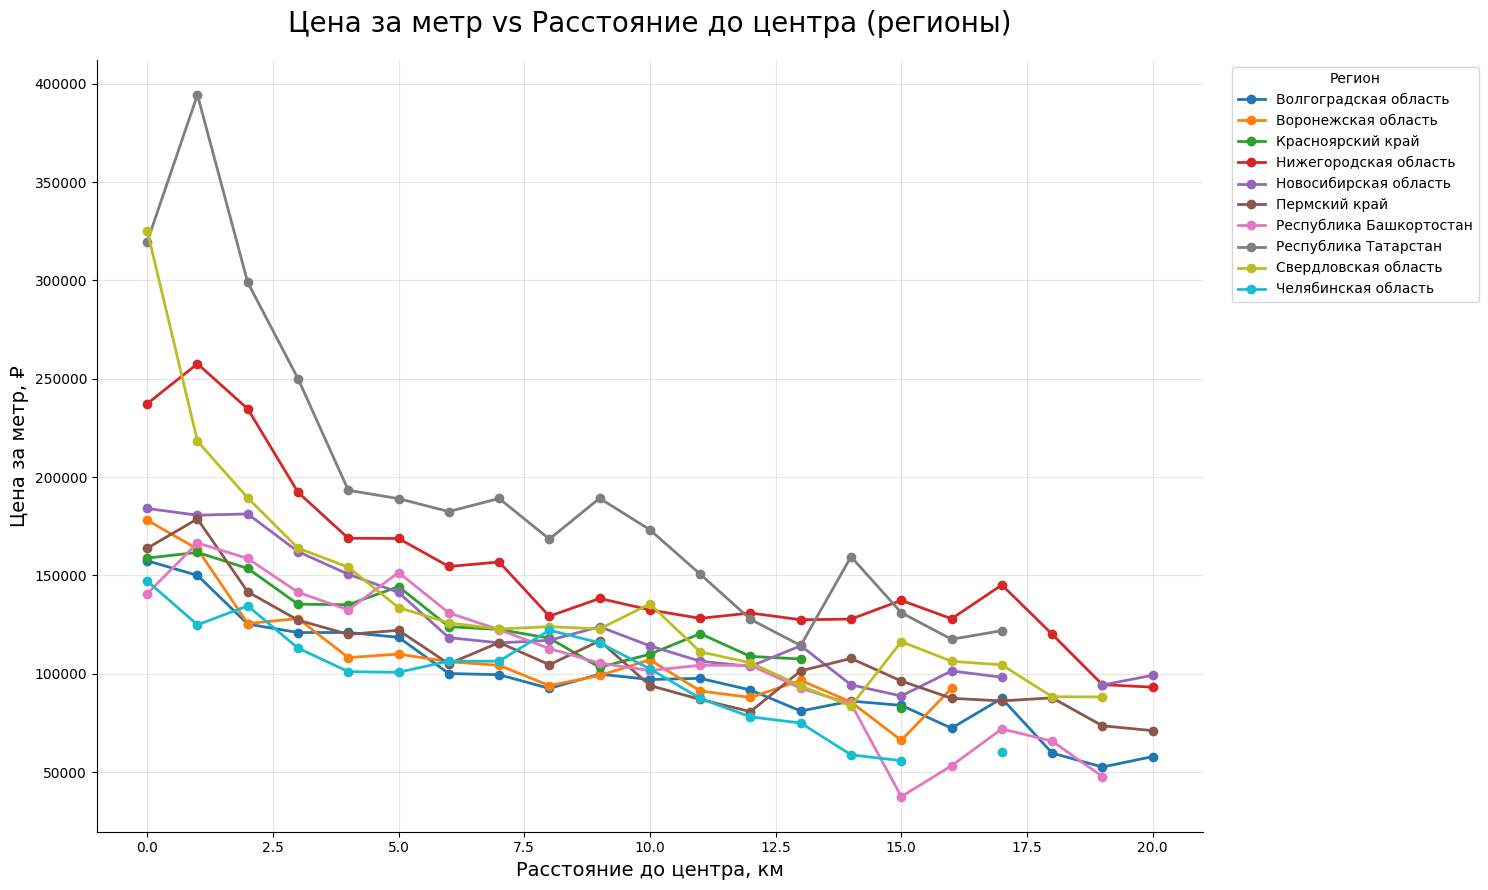

In [57]:
import matplotlib.pyplot as plt

# Создаём pivot_table
df_pivot = (
    df.query('`Расстояние до центра, км` <= 20 and Гео1 != "Москва" and Гео1 != "Санкт-Петербург"')
    .pivot_table(index='Расстояние до центра, км', columns='Гео1', values='Цена метра')
)

# Строим улучшенный график
fig, ax = plt.subplots(figsize=(15, 9))

df_pivot.plot(ax=ax, linewidth=2, marker='o')

# Заголовок и подписи
ax.set_title("Цена за метр vs Расстояние до центра (регионы)", fontsize=20, pad=20)
ax.set_xlabel("Расстояние до центра, км", fontsize=14)
ax.set_ylabel("Цена за метр, ₽", fontsize=14)

# Легенда сбоку, чтобы не перекрывала график
ax.legend(title="Регион", bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)

# Убираем лишние рамки и делаем сетку мягкой
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
